<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


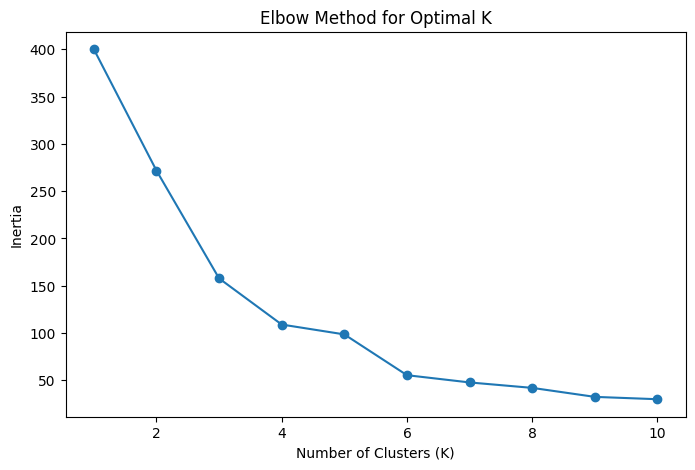

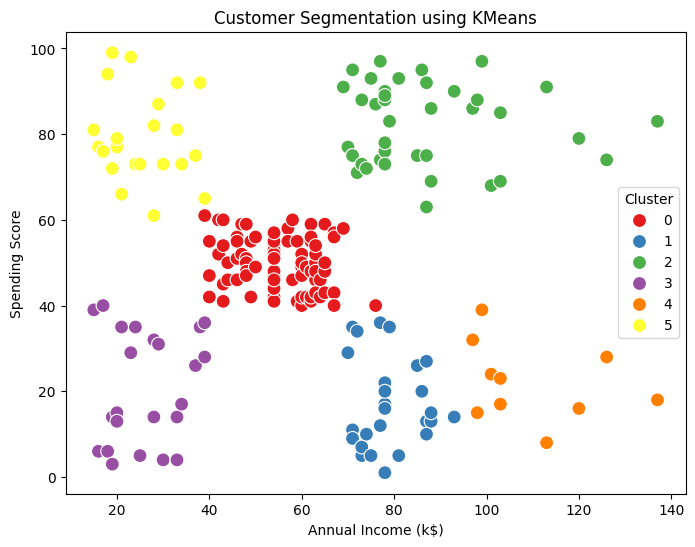

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("/kaggle/input/mall-customer-segmentation/Mall_Customers.csv")
df.head()
df.info()
df.describe()
df = df.drop('CustomerID', axis=1)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=60)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()
kmeans = KMeans(n_clusters=6, random_state=60)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set1',
    s=100
)

plt.title("Customer Segmentation using KMeans")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()
df.to_csv("segmented_customers.csv", index=False)

